In [23]:
import pandas as pd

import numpy as np

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

# For normalization
from sklearn.preprocessing import StandardScaler

# Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

# For splitting function 
from sklearn.model_selection import train_test_split

# Naive Bayes Machine learning library
from sklearn.naive_bayes import GaussianNB

# Import the metrics
from sklearn import metrics

# Import the classification_report from metrics
from sklearn.metrics import classification_report

In [27]:
diabetes_data = pd.read_csv('cogi_impair.csv')
diabetes_data.shape

(320, 24)

In [30]:
diabetes_data.head(10)

ID Gen   Age   Edu  MMSE  Phonemic Fluency   Semantic Fluency  Token  \
0   1   F  87.0   3.0  15.0               17.0              7.00   20.0   
1   2   F  71.0   5.0  17.0                4.0              4.50   23.0   
2   3   M  81.0  13.0  21.0                2.0             11.75   26.5   
3   4   F  75.0   8.0  22.0               13.0             12.50   29.0   
4   5   F  74.0   5.0  16.0               15.0              8.25   21.0   
5   6   M  64.0  18.0  22.0               22.0             11.00   32.5   
6   7   M  77.0   3.0  18.0                3.0              8.00   25.5   
7   8   M  66.0  12.0  24.0                7.0              8.00   27.5   
8   9   M  78.0   4.0  17.0                5.0              8.00   23.0   
9  10   F  71.0   8.0  22.0               17.0             16.00   28.0   

   Digit Span  Prose memory test - immediate recall   ...  \
0         3.0                                    0.0  ...   
1         5.0                                    0.0  ...   
2         5.0                                    0.0  ...   
3         3.0                                    0.0  ...   
4         4.0                                    0.0  ...   
5         6.0                                    0.0  ...   
6         5.0                                    0.0  ...   
7         5.0                                    1.0  ...   
8         4.0                                    0.0  ...   
9         5.0                                    5.0  ...   

   Semantically related words-list learning - delayed interference  \
0                                                0.0                 
1                                                1.0                 
2                                                0.0                 
3                                                0.0                 
4                                                0.0                 
5                                                0.0                 
6                                                0.0                 
7                                                0.0                 
8                                                0.0                 
9                                                0.0                 

   Semantically related words-list learning - detection through distractors   \
0                                               22.0                           
1                                               20.0                           
2                                               22.0                           
3                                               23.0                           
4                                               23.0                           
5                                               20.0                           
6                                               24.0                           
7                                               18.0                           
8                                               27.0                           
9                                               19.0                           

   Corsi Span  Rey-Osterrieth Complex Figure - copy   \
0         2.0                                   12.5   
1         3.0                                    7.5   
2         4.0                                   29.0   
3         5.0                                   27.0   
4         3.0                                    4.0   
5         3.0                                   34.0   
6         4.0                                   27.0   
7         2.0                                   28.0   
8         3.0                                    3.5   
9         4.0                                   14.0   

   Rey-Osterrieth Complex Figure - delayed recall   Drawings copy  \
0                                              0.0            8.0   
1                                              4.5            6.0   
2                            

In [31]:

diabetes_data.tail()

ID Gen   Age   Edu  MMSE  Phonemic Fluency   Semantic Fluency  Token  \
315  316   M  82.0   5.0  23.0               10.0             13.25   28.5   
316  317   M  88.0  17.0  26.0               24.0              9.75   30.0   
317  318   M  62.0  13.0  24.0                5.0              8.00   28.5   
318  319   F  75.0   6.0  24.0               31.0             18.75   30.5   
319  320   M  82.0  13.0  25.0               16.0              8.75   23.5   

     Digit Span  Prose memory test - immediate recall   ...  \
315         5.0                                    5.2  ...   
316         5.0                                    1.1  ...   
317         5.0                                    3.0  ...   
318         5.0                                    5.3  ...   
319         6.0                                    2.0  ...   

     Semantically related words-list learning - delayed interference  \
315                                                1.0                 
316                                                0.0                 
317                                                1.0                 
318                                                1.0                 
319                                                0.0                 

     Semantically related words-list learning - detection through distractors   \
315                                               29.0                           
316                                               31.0                           
317                                               25.0                           
318                                               26.0                           
319                                               18.0                           

     Corsi Span  Rey-Osterrieth Complex Figure - copy   \
315         4.0                                   29.0   
316         4.0                                   23.0   
317         4.0                                   12.0   
318         4.0                                   25.0   
319         4.0                                   29.0   

     Rey-Osterrieth Complex Figure - delayed recall   Drawings copy  \
315                                              5.5           11.0   
316                                             11.5           11.0   
317                                              5.5           10.0   
318                                              4.0           12.0   
319                                             10.0           12.0   

     Attentive matrices   Raven's Progressive Matrices   TMT_A  \
315                 33.0                           18.0   73.0   
316                 34.0                           27.0   58.0   
317                 19.0                            9.0  203.0   
318                 58.0                           16.0   55.0   
319                 38.0                           22.0   54.0   

     TMT_B - dichotomised  
315                   1.0  
316                   1.0  
317                   0.0  
318                   1.0  
319                   1.0  

[5 rows x 24 columns]

In [32]:
diabetes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 24 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   ID                                                                         320 non-null    int64  
 1   Gen                                                                        320 non-null    object 
 2   Age                                                                        320 non-null    float64
 3   Edu                                                                        320 non-null    float64
 4   MMSE                                                                       320 non-null    float64
 5   Phonemic Fluency                                                           320 non-null    float64
 6   Semantic Fluency                                          

In [33]:
diabetes_data.shape


(320, 24)

In [34]:
diabetes_data.columns

Index(['ID', 'Gen', 'Age', 'Edu', 'MMSE', 'Phonemic Fluency ',
       'Semantic Fluency', 'Token', 'Digit Span',
       'Prose memory test - immediate recall ',
       'Prose memory test - delayed recall ',
       'Semantically related words-list learning - immediate recall',
       'Semantically related words-list learning - immediate interference',
       'Semantically related words-list learning - delayed recall',
       'Semantically related words-list learning - delayed interference',
       'Semantically related words-list learning - detection through distractors ',
       'Corsi Span', 'Rey-Osterrieth Complex Figure - copy ',
       'Rey-Osterrieth Complex Figure - delayed recall ', 'Drawings copy',
       'Attentive matrices ', 'Raven's Progressive Matrices ', 'TMT_A',
       'TMT_B - dichotomised'],
      dtype='object')

In [35]:
diabetes_data.describe().T

count        mean  \
ID                                                  320.0  160.500000   
Age                                                 320.0   75.793750   
Edu                                                 320.0    6.831250   
MMSE                                                320.0   22.240625   
Phonemic Fluency                                    320.0   17.471094   
Semantic Fluency                                    320.0   11.821094   
Token                                               320.0   27.948594   
Digit Span                                          320.0    4.675000   
Prose memory test - immediate recall                320.0    2.290000   
Prose memory test - delayed recall                  320.0    2.075937   
Semantically related words-list learning - imme...  320.0   22.403125   
Semantically related words-list learning - imme...  320.0    3.143750   
Semantically related words-list learning - dela...  320.0    2.468750   
Semantically related words-list learning - dela...  320.0    0.815625   
Semantically related words-list learning - dete...  320.0   22.481781   
Corsi Span                                          320.0    3.793750   
Rey-Osterrieth Complex Figure - copy                320.0   19.207187   
Rey-Osterrieth Complex Figure - delayed recall      320.0    4.025000   
Drawings copy                                       320.0    9.687500   
Attentive matrices                                  320.0   33.690625   
Raven's Progressive Matrices                        320.0   17.392187   
TMT_A                                               320.0  123.146875   
TMT_B - dichotomised                                320.0    0.212500   

                                                          std    min    25%  \
ID                                                  92.520268   1.00  80.75   
Age                                                  6.914704  50.00  71.00   
Edu                                                  3.522826   0.00   5.00   
MMSE                                                 3.582644  13.00  20.00   
Phonemic Fluency                                     8.645046   1.00  11.00   
Semantic Fluency                                     3.999587   2.75   9.50   
Token                                                3.275398  18.00  26.00   
Digit Span                                           0.950499   3.00   4.00   
Prose memory test - immediate recall                 2.151334   0.00   0.00   
Prose memory test - delayed recall                   2.397350   0.00   0.00   
Semantically related words-list learning - imme...   9.444608   4.00  16.00   
Semantically related words-list learning - imme...   3.623066   0.00   1.00   
Semantically related words-list learning - dela...   3.265516   0.00   0.00   
Semantically related words-list learning - dela...   1.498298   0.00   0.00   
Semantically related words-list learning - dete...   4.731762   0.17  19.00   
Corsi Span                                           0.812110   0.00   4.00   
Rey-Osterrieth Complex Figure - copy                 8.063551   0.50  13.00   
Rey-Osterrieth Complex Figure - delayed recall       4.507500   0.00   0.00   
Drawings copy                                        2.054699   2.00   8.00   
Attentive matrices                                  10.594310   4.00  26.00   
Raven's Progressive Matrices                         5.585480   2.00  14.00   
TMT_A                                               70.282816  24.00  75.00   
TMT_B - dichotomised                                 0.409717   0.00   0.00   

                                                       50%       75%    max  
ID                                                  160.50  240.2500  320.0  
Age                                                  77.00   81.0000   90.0  
Edu                                                   5.00    8.0000   18.0  
MMSE                                                 23.00   25.0000   30.0  
Phonemic Flu

<AxesSubplot:xlabel='TMT_B - dichotomised', ylabel='count'>

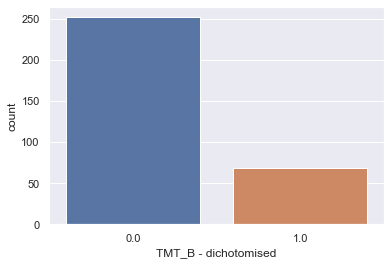

In [40]:
sns.countplot(x="TMT_B - dichotomised", data=diabetes_data)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Edu'}>,
        <AxesSubplot:title={'center':'MMSE'}>,
        <AxesSubplot:title={'center':'Phonemic Fluency '}>],
       [<AxesSubplot:title={'center':'Semantic Fluency'}>,
        <AxesSubplot:title={'center':'Token'}>,
        <AxesSubplot:title={'center':'Digit Span'}>,
        <AxesSubplot:title={'center':'Prose memory test - immediate recall '}>,
        <AxesSubplot:title={'center':'Prose memory test - delayed recall '}>],
       [<AxesSubplot:title={'center':'Semantically related words-list learning - immediate recall'}>,
        <AxesSubplot:title={'center':'Semantically related words-list learning - immediate interference'}>,
        <AxesSubplot:title={'center':'Semantically related words-list learning - delayed recall'}>,
        <AxesSubplot:title={'center':'Semantically related words-list learning - delayed interference'}>,
        <AxesSubplot

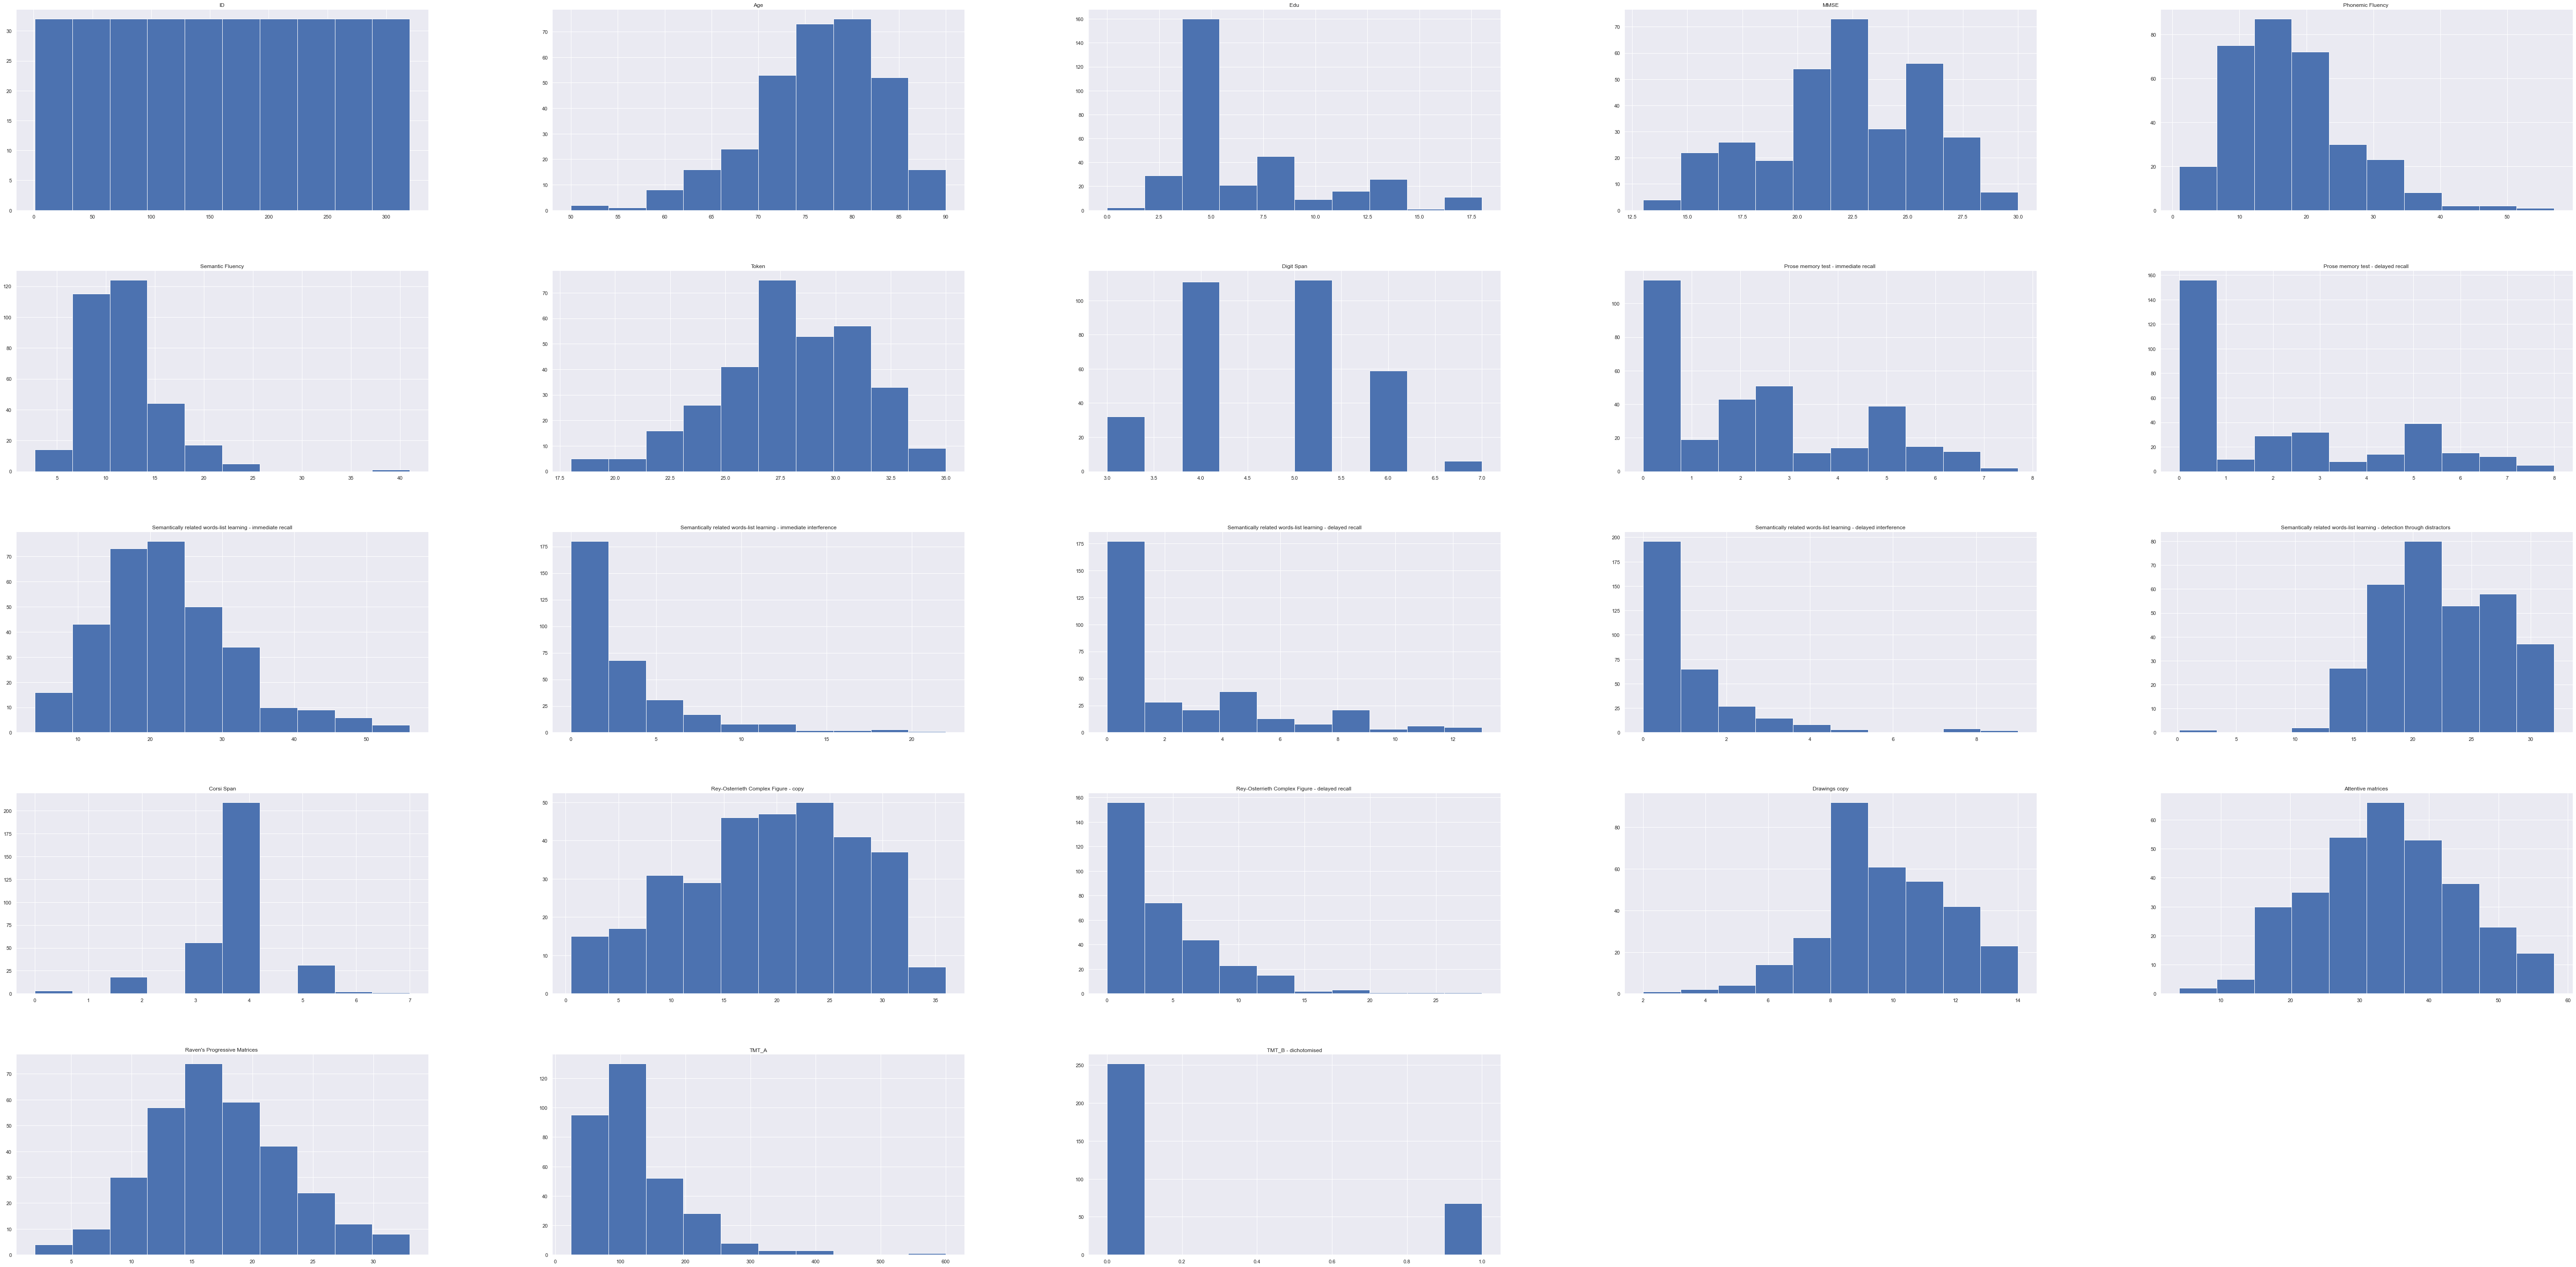

In [43]:
diabetes_data.hist(figsize=(100,50))

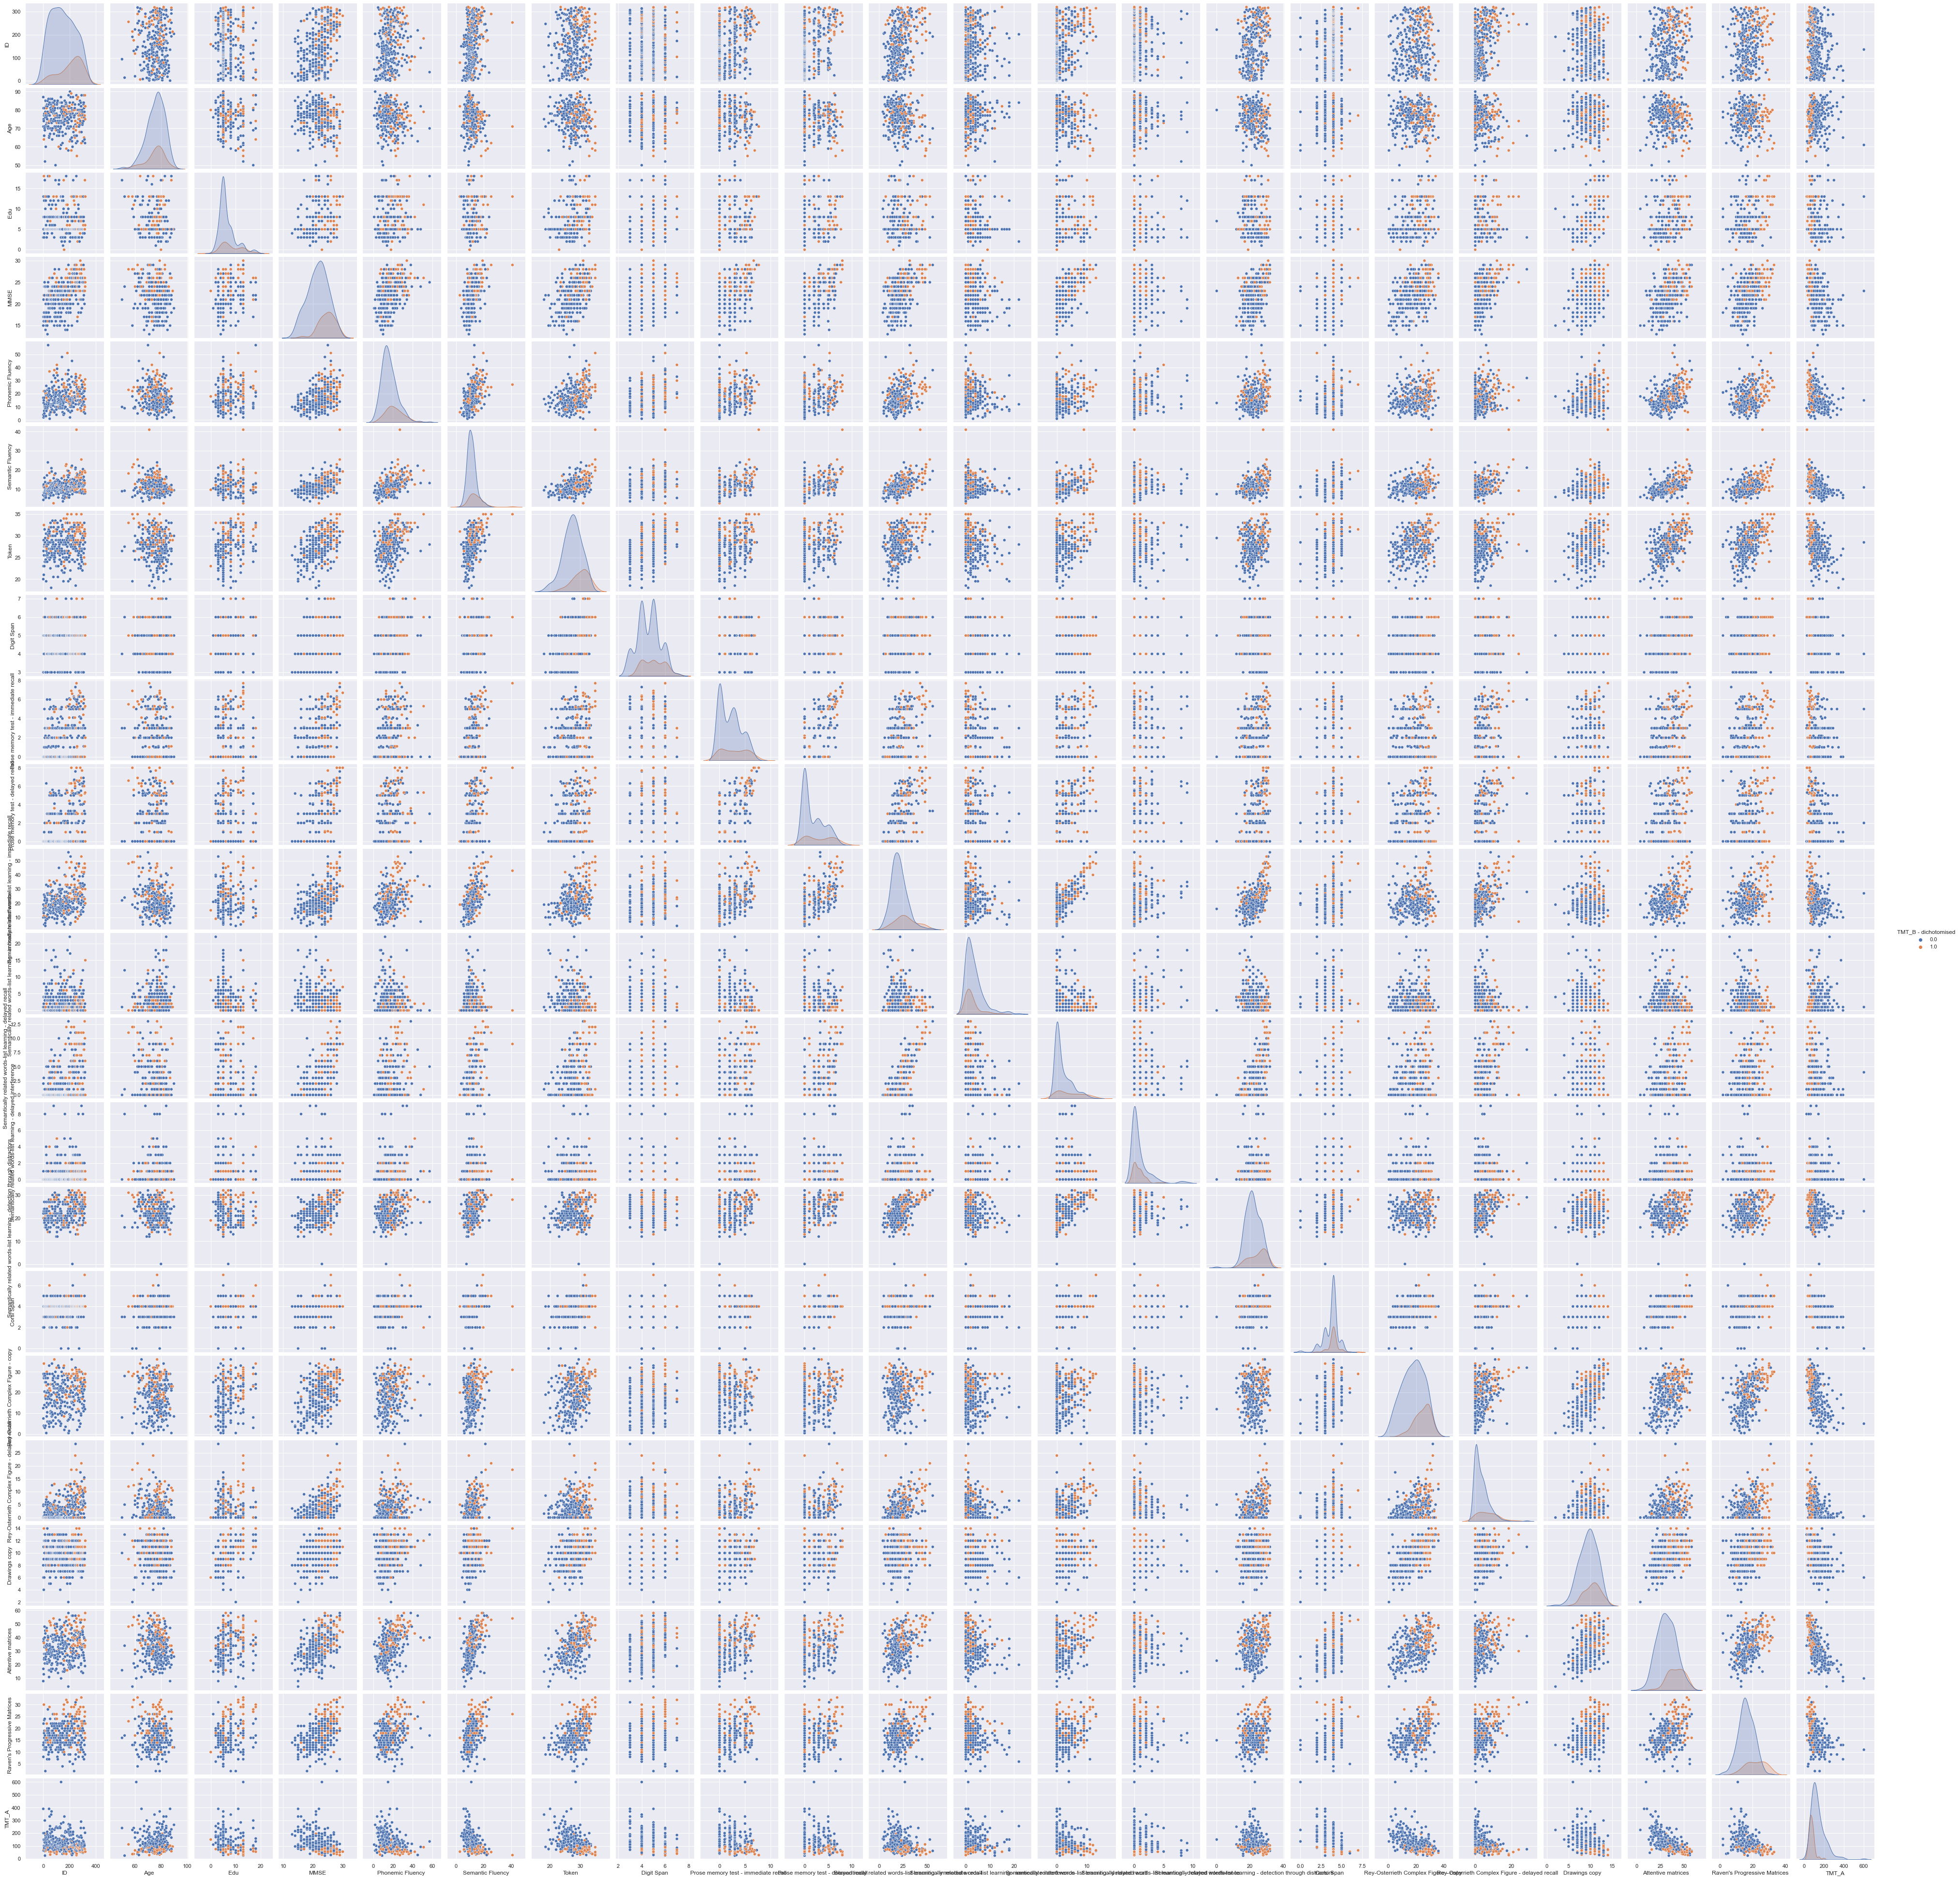

In [44]:
sns.pairplot(diabetes_data, hue="TMT_B - dichotomised")

In [45]:
cor=diabetes_data.corr()
cor

ID       Age  \
ID                                                  1.000000  0.028028   
Age                                                 0.028028  1.000000   
Edu                                                -0.063430 -0.165127   
MMSE                                                0.461986 -0.149081   
Phonemic Fluency                                    0.172071 -0.131438   
Semantic Fluency                                    0.287206 -0.168501   
Token                                               0.145393 -0.105503   
Digit Span                                         -0.007842  0.004555   
Prose memory test - immediate recall                0.344471 -0.109277   
Prose memory test - delayed recall                  0.430698 -0.147046   
Semantically related words-list learning - imme...  0.378236 -0.234265   
Semantically related words-list learning - imme...  0.000748  0.117933   
Semantically related words-list learning - dela...  0.398596 -0.207976   
Semantically related words-list learning - dela...  0.109508 -0.046951   
Semantically related words-list learning - dete...  0.280749 -0.142329   
Corsi Span                                          0.083484  0.114656   
Rey-Osterrieth Complex Figure - copy                0.110751 -0.035287   
Rey-Osterrieth Complex Figure - delayed recall      0.418513 -0.163775   
Drawings copy                                      -0.067395 -0.028601   
Attentive matrices                                  0.165884 -0.083334   
Raven's Progressive Matrices                        0.172977 -0.037021   
TMT_A                                              -0.204472  0.044248   
TMT_B - dichotomised                                0.250571 -0.020996   

                                                         Edu      MMSE  \
ID                                                 -0.063430  0.461986   
Age                                                -0.165127 -0.149081   
Edu                                                 1.000000  0.224781   
MMSE                                                0.224781  1.000000   
Phonemic Fluency                                    0.177655  0.405965   
Semantic Fluency                                    0.086623  0.488741   
Token                                               0.263330  0.487255   
Digit Span                                          0.312174  0.272510   
Prose memory test - immediate recall                0.029310  0.331060   
Prose memory test - delayed recall                  0.047400  0.435081   
Semantically related words-list learning - imme...  0.055755  0.513620   
Semantically related words-list learning - imme... -0.127037 -0.177766   
Semantically related words-list learning - dela...  0.024065  0.517118   
Semantically related words-list learning - dela... -0.065304  0.025227   
Semantically related words-list learning - dete... -0.000185  0.407761   
Corsi Span                                          0.043679  0.306941   
Rey-Osterrieth Complex Figure - copy                0.222706  0.419915   
Rey-Osterrieth Complex Figure - delayed recall      0.042612  0.492594   
Drawings copy                                       0.384631  0.318137   
Attentive matrices                                  0.207824  0.484134   
Raven's Progressive Matrices                        0.256606  0.437664   
TMT_A                                              -0.082158 -0.413618   
TMT_B - dichotomised                                0.213875  0.358008   

                                                    Phonemic Fluency   \
ID                                                           0.172071   
Age                                                         -0.131438   
Edu                                                          0.177655   
MMSE                                                         0.405965   
Phonemic Fluency                                             1.000000   
Semantic Fluency                                             0.489

<AxesSubplot:>

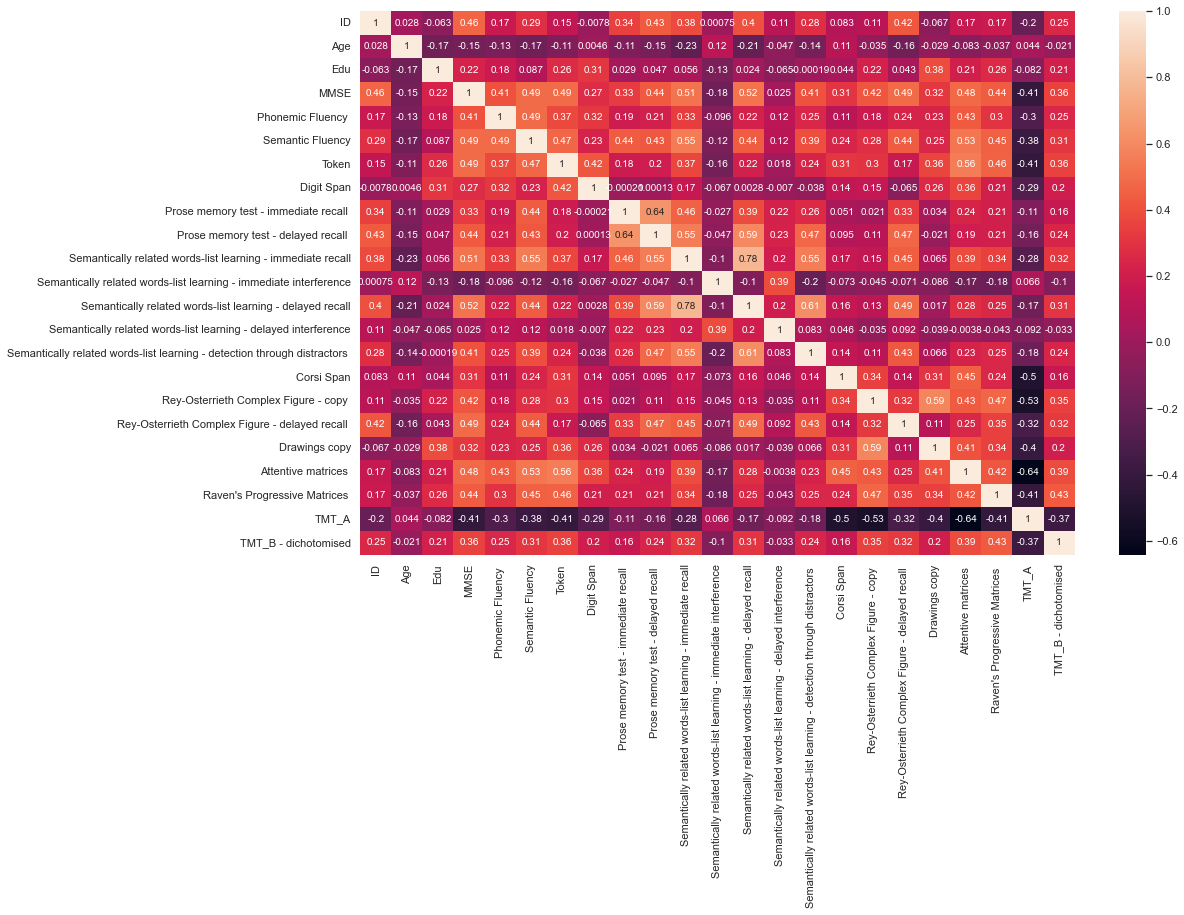

In [55]:
plt.figure(figsize = (16,10))
sns.heatmap(cor, annot=True)

In [47]:
diabetes_data.isnull().values.any()

False

In [51]:
diabetes_data.isnull().sum()


ID                                                                           0
Gen                                                                          0
Age                                                                          0
Edu                                                                          0
MMSE                                                                         0
Phonemic Fluency                                                             0
Semantic Fluency                                                             0
Token                                                                        0
Digit Span                                                                   0
Prose memory test - immediate recall                                         0
Prose memory test - delayed recall                                           0
Semantically related words-list learning - immediate recall                  0
Semantically related words-list learning - immediate

In [ ]:
# data = diabetes_data[['Plas','Pres','skin','test','mass','pedi']]=diabetes_data[['Plas','Pres','skin','test','mass','pedi']].replace(0,np.nan)
# data.head(15)
# data.isnull().sum()[['Plas','Pres','skin','test','mass','pedi']]
# diabetes_data['Plas'].fillna(diabetes_data['Plas'].median(),inplace=True)
# diabetes_data['Pres'].fillna(diabetes_data['Pres'].median(),inplace=True)
# diabetes_data['skin'].fillna(diabetes_data['skin'].median(),inplace=True)
# diabetes_data['test'].fillna(diabetes_data['test'].median(),inplace=True)
# diabetes_data['mass'].fillna(diabetes_data['mass'].median(),inplace=True)
# diabetes_data.head()


In [56]:
diabetes_data.replace(' ',"")


ID Gen   Age   Edu  MMSE  Phonemic Fluency   Semantic Fluency  Token  \
0      1   F  87.0   3.0  15.0               17.0              7.00   20.0   
1      2   F  71.0   5.0  17.0                4.0              4.50   23.0   
2      3   M  81.0  13.0  21.0                2.0             11.75   26.5   
3      4   F  75.0   8.0  22.0               13.0             12.50   29.0   
4      5   F  74.0   5.0  16.0               15.0              8.25   21.0   
..   ...  ..   ...   ...   ...                ...               ...    ...   
315  316   M  82.0   5.0  23.0               10.0             13.25   28.5   
316  317   M  88.0  17.0  26.0               24.0              9.75   30.0   
317  318   M  62.0  13.0  24.0                5.0              8.00   28.5   
318  319   F  75.0   6.0  24.0               31.0             18.75   30.5   
319  320   M  82.0  13.0  25.0               16.0              8.75   23.5   

     Digit Span  Prose memory test - immediate recall   ...  \
0           3.0                                    0.0  ...   
1           5.0                                    0.0  ...   
2           5.0                                    0.0  ...   
3           3.0                                    0.0  ...   
4           4.0                                    0.0  ...   
..          ...                                    ...  ...   
315         5.0                                    5.2  ...   
316         5.0                                    1.1  ...   
317         5.0                                    3.0  ...   
318         5.0                                    5.3  ...   
319         6.0                                    2.0  ...   

     Semantically related words-list learning - delayed interference  \
0                                                  0.0                 
1                                                  1.0                 
2                                                  0.0                 
3                                                  0.0                 
4                                                  0.0                 
..                                                 ...                 
315                                                1.0                 
316                                                0.0                 
317                                                1.0                 
318                                                1.0                 
319                                                0.0                 

     Semantically related words-list learning - detection through distractors   \
0                                                 22.0                           
1                                                 20.0                           
2                                                 22.0                           
3                                                 23.0                           
4                                                 23.0                           
..                                                 ...                           
315                                               29.0                           
316                                               31.0                           
317                                               25.0                           
318                                               26.0                           
319                                               18.0                           

     Corsi Span  Rey-Osterrieth Complex Figure - copy   \
0           2.0                                   12.5   
1           3.0                                    7.5   
2           4.0                                   29.0   
3           5.0                                   27.0   
4           3.0                                    4.0   
..          ...                                    ...   
315         4.0                                   29.0  

In [57]:
maxvalues = diabetes_data.max()
maxvalues

ID                                                                             320
Gen                                                                              M
Age                                                                           90.0
Edu                                                                           18.0
MMSE                                                                          30.0
Phonemic Fluency                                                              57.0
Semantic Fluency                                                              41.0
Token                                                                         35.0
Digit Span                                                                     7.0
Prose memory test - immediate recall                                           7.7
Prose memory test - delayed recall                                             8.0
Semantically related words-list learning - immediate recall                   56.0
Sema

In [ ]:
# # Dividing the age into buckets

# def age(df):
#     df.loc[(df['age'] > 20) & (df['age'] <= 39), 'age'] = 1
#     df.loc[(df['age'] > 40) & (df['age'] <= 59), 'age'] = 2
#     df.loc[(df['age'] > 60) & (df['age'] <= 81), 'age'] = 3       
#     return df
# age(diabetes_data)

In [95]:
# print(diabetes_data.dtypes)
diabetes_data=diabetes_data.replace('F',0.0);
diabetes_data=diabetes_data.replace('M',1.0);
diabetes_data.head()


ID  Gen   Age   Edu  MMSE  Phonemic Fluency   Semantic Fluency  Token  \
0   1  0.0  87.0   3.0  15.0               17.0              7.00   20.0   
1   2  0.0  71.0   5.0  17.0                4.0              4.50   23.0   
2   3  1.0  81.0  13.0  21.0                2.0             11.75   26.5   
3   4  0.0  75.0   8.0  22.0               13.0             12.50   29.0   
4   5  0.0  74.0   5.0  16.0               15.0              8.25   21.0   

   Digit Span  Prose memory test - immediate recall   ...  \
0         3.0                                    0.0  ...   
1         5.0                                    0.0  ...   
2         5.0                                    0.0  ...   
3         3.0                                    0.0  ...   
4         4.0                                    0.0  ...   

   Semantically related words-list learning - delayed interference  \
0                                                0.0                 
1                                                1.0                 
2                                                0.0                 
3                                                0.0                 
4                                                0.0                 

   Semantically related words-list learning - detection through distractors   \
0                                               22.0                           
1                                               20.0                           
2                                               22.0                           
3                                               23.0                           
4                                               23.0                           

   Corsi Span  Rey-Osterrieth Complex Figure - copy   \
0         2.0                                   12.5   
1         3.0                                    7.5   
2         4.0                                   29.0   
3         5.0                                   27.0   
4         3.0                                    4.0   

   Rey-Osterrieth Complex Figure - delayed recall   Drawings copy  \
0                                              0.0            8.0   
1                                              4.5            6.0   
2                                              5.0           11.0   
3                                              0.5            9.0   
4                                              0.0            4.0   

   Attentive matrices   Raven's Progressive Matrices   TMT_A  \
0                  8.0                           13.0  390.0   
1                 17.0                            8.0  200.0   
2                 37.0                           22.0   64.0   
3                 39.0                           14.0  146.0   
4                 13.0                           11.0  150.0   

   TMT_B - dichotomised  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 24 columns]

In [112]:
X= diabetes_data.drop("TMT_B - dichotomised", axis=1)
# X=X.drop("ID",axis=1)
y= diabetes_data["TMT_B - dichotomised"]

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
columns=X_train.columns

In [114]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)

In [116]:
reg.score(X_test, y_test)


0.71875

Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)


In [126]:
clf.score(X_test,y_test)


0.8125

SVM (Support Vector Machine)

In [121]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred = svc.predict(X_test)

In [122]:
svc.score(X_test,y_test)

0.8020833333333334

Naive Bayes Model

In [128]:
# invoke the Gaussian function and find the bestfit model on training data
model=GaussianNB()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [129]:
model_score = model.score(X_test, y_test)
print('Model score :',model_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test,pred))

Model score : 0.8020833333333334
Confusion Matrix:
 [[63 14]
 [ 5 14]]


<AxesSubplot:>

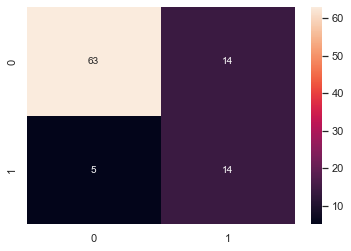

In [130]:
sns.heatmap(metrics.confusion_matrix(y_test,pred), annot=True)

In [131]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87        77
         1.0       0.50      0.74      0.60        19

    accuracy                           0.80        96
   macro avg       0.71      0.78      0.73        96
weighted avg       0.84      0.80      0.81        96



In [134]:
print('Accuracy :',metrics.accuracy_score(y_test,pred))
print('Precision :',metrics.precision_score(y_test,pred))

Accuracy : 0.8020833333333334
Precision : 0.5
